# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [17]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
print("Start of Data Retrieval ")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Start of Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | baiao
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | banjar
Processing Record 4 of Set 1 | delta
Processing Record 5 of Set 1 | sioux lookout
Processing Record 6 of Set 1 | ulverstone
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | chapais
Processing Record 10 of Set 1 | mazyr
City not found. Skipping...
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | hammerfest
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | norwich
City not found. Skipping...
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | kungurtug
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | klaksvik
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | 

Processing Record 36 of Set 4 | nioro
City not found. Skipping...
Processing Record 37 of Set 4 | waw
Processing Record 38 of Set 4 | oranjestad
Processing Record 39 of Set 4 | verkhnyaya inta
Processing Record 40 of Set 4 | teguise
Processing Record 41 of Set 4 | indiana
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | bow island
Processing Record 44 of Set 4 | mounana
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | zhaoqing
Processing Record 47 of Set 4 | gizo
Processing Record 48 of Set 4 | sawtell
Processing Record 49 of Set 4 | la paz
Processing Record 50 of Set 4 | tutoia
Processing Record 0 of Set 5 | marystown
Processing Record 1 of Set 5 | pevek
Processing Record 2 of Set 5 | caraballeda
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | portsmouth
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | ola
Processing Record 8 of Set 5 | nkawkaw
Pro

Processing Record 19 of Set 8 | cam ranh
Processing Record 20 of Set 8 | mugur-aksy
City not found. Skipping...
Processing Record 21 of Set 8 | taltal
Processing Record 22 of Set 8 | ruthin
Processing Record 23 of Set 8 | makakilo city
Processing Record 24 of Set 8 | lowestoft
Processing Record 25 of Set 8 | chake chake
Processing Record 26 of Set 8 | saint-junien
Processing Record 27 of Set 8 | grand gaube
Processing Record 28 of Set 8 | luanda
Processing Record 29 of Set 8 | rocha
Processing Record 30 of Set 8 | concordia
Processing Record 31 of Set 8 | monrovia
Processing Record 32 of Set 8 | bulgan
Processing Record 33 of Set 8 | pisco
Processing Record 34 of Set 8 | yeppoon
Processing Record 35 of Set 8 | neryungri
Processing Record 36 of Set 8 | kutahya
Processing Record 37 of Set 8 | mezen
Processing Record 38 of Set 8 | lagoa
Processing Record 39 of Set 8 | kochubey
Processing Record 40 of Set 8 | amboasary
Processing Record 41 of Set 8 | orange walk
Processing Record 42 of Set

Processing Record 1 of Set 12 | abalak
Processing Record 2 of Set 12 | walker
Processing Record 3 of Set 12 | bar harbor
Processing Record 4 of Set 12 | namatanai
Processing Record 5 of Set 12 | bambanglipuro
Processing Record 6 of Set 12 | peterborough
Processing Record 7 of Set 12 | puerto maldonado
Processing Record 8 of Set 12 | novaya bryan
Processing Record 9 of Set 12 | chumikan
Processing Record 10 of Set 12 | pemangkat
Processing Record 11 of Set 12 | ambilobe
Processing Record 12 of Set 12 | kalianget
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
#Create Dataframe
weather_dict = pd.DataFrame({ 
                "City" : city_name,
                "Latitude" : latitude,
                "Longitude" : longitude,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date
})

In [23]:
#Get a count of each attribute
weather_dict.count()

City          573
Latitude      573
Longitude     573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [25]:
#show DataFrame
weather_dict

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baião,-2.79,-49.67,89.19,52,100,3.33,BR,1603305102
1,Butaritari,3.07,172.79,82.53,69,100,7.72,KI,1603304557
2,Banjar,-8.19,114.97,78.80,88,40,8.05,ID,1603305102
3,Delta,5.50,6.00,77.05,93,45,4.47,NG,1603305004
4,Sioux Lookout,50.10,-91.92,32.00,83,90,2.24,CA,1603305103
...,...,...,...,...,...,...,...,...,...
568,Novaya Bryan’,51.72,108.27,30.20,86,40,2.24,RU,1603305174
569,Chumikan,54.72,135.31,39.15,92,100,16.64,RU,1603305174
570,Pemangkat,1.17,108.97,79.00,85,100,4.70,ID,1603305175
571,Ambilobe,-13.20,49.05,76.55,69,80,5.86,MG,1603305175


In [24]:
weather_dict.to_csv(r'output_data/cities.csv', index_label='City_ID')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# there are none greater than 100 at this point, I don't even know how to drop a record!

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: '../Images/City Latitude vs Max Temperature.png'

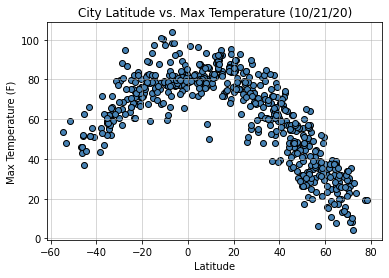

In [40]:
#Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Latitude"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")
#need to figure out how to set my y axis to be less than 0?
#title
plt.title("City Latitude vs. Max Temperature (10/21/20)")

# Add x axis label
plt.xlabel("Latitude")

# Add y axis label
plt.ylabel("Max Temperature (F)")

# Add grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")


The curve of the dataset is interesting. It's like a U, as you get closer to latitude 0 on either side,th max temperature drops (overall there are some outliers). The higher the latitude number the lower the Max temps, the lower the latitude number the higher the max temperature is. 

FileNotFoundError: [Errno 2] No such file or directory: '../Images/City Latitude vs Humidity.png'

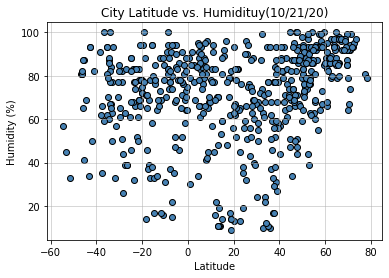

In [33]:
#Latitude vs Humidity Plot
plt.scatter(weather_dict["Latitude"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs. Humidituy(10/21/20)")

# add x axis label
plt.xlabel("Latitude")

# add y axis label 
plt.ylabel("Humidity (%)")

# add grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")


This shows that there are considerablly less data points in the lower latitude regions which indicates there is lower humidity in lower lower regions.  Higher humidity towards the higher latitudes.  Does this mean since there are more people in the higher latitude regions there is more humidity?  Maybe something to consider. 

## Latitude vs. Cloudiness Plot

FileNotFoundError: [Errno 2] No such file or directory: '../Images/City Latitude vs Cloudiness.png'

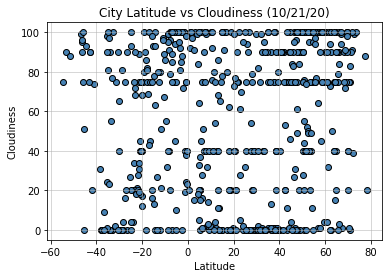

In [37]:
#Latitude vs Cloudiness
plt.scatter(weather_dict["Latitude"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs Cloudiness (10/21/20)")  

#add x axis label
plt.xlabel("Latitude")

#add y axis label
plt.ylabel("Cloudiness")

#add grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save as png
plt.savefig("../Images/City Latitude vs Cloudiness.png")

Theres seems to be no real deliniation to me that there is a correlation between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: '../Images/City Latitude vs Wind Speed.png'

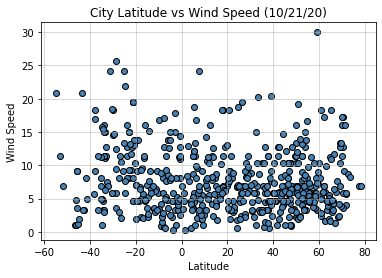

In [38]:
#Latitude vs Wind Speed
plt.scatter(weather_dict["Latitude"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs Wind Speed (10/21/20)")  

#add x axis label
plt.xlabel("Latitude")

#add y axis label
plt.ylabel("Wind Speed")

#add grid lines
plt.grid(linestyle = '-', linewidth=1, alpha =0.5)

#save as png
plt.savefig("../Images/City Latitude vs Wind Speed.png")

There seems to be consistent wind speeds around 5(mph?)speed in the higher latitudes, specifically betwen 45-75 Latitude.  There  is a consistent pattern of wind speeds =< then 10 consistently across the latitude.  I don't like this chart. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression